# SET-UP ENVIRONMENT

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#1 Load the dataset
df = pd.read_csv('world_health_data.csv')

#Display First Rows
df.head()


,country,country_code,year,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,inci_tuberc,prev_undernourishment
0,Aruba,ABW,1999,NaN,73.561000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1999,NaN,51.258874,NaN,88.285642,38.433841,142.506373,6.684793,NaN,NaN
2,Afghanistan,AFG,1999,NaN,54.846000,NaN,94.600000,64.000000,135.800000,0.100000,NaN,NaN
3,Africa Western and Central,AFW,1999,NaN,49.726429,NaN,101.541373,44.733554,173.943151,NaN,NaN,NaN
4,Angola,AGO,1999,NaN,45.386000,NaN,123.500000,51.000000,208.000000,1.300000,NaN,NaN


#Global Visualization ("5 Year Constraint")

In [8]:
# 2. Filter for the "5-Year" Constraint
# We select only the specific years we want to compare to make it readable on paper
selected_years = [2000, 2005, 2010, 2015, 2020]
df_filtered = df[df['year'].isin(selected_years)].copy()

# 3. Handle data sorting to ensure years appear in order
df_filtered = df_filtered.sort_values(by='year')

# 4. Create the Global Choropleth Map
# We use 'facet_col' to create side-by-side maps, and 'facet_col_wrap' to stack them
fig = px.choropleth(
    df_filtered,
    locations="country_code",      # The column with ISO-3 codes (e.g., USA, PHL)
    color="life_expect",           # The metric we are visualizing
    hover_name="country",          # Show country name when hovering
    facet_col="year",              # Create a separate map for each year
    facet_col_wrap=2,              # Arranges maps in 2 columns (better for documents/paper)
    color_continuous_scale=px.colors.sequential.Plasma, # A clear color scale
    range_color=[45, 85],          # Fixes color scale so comparison is accurate across years
    title="Global Life Expectancy Progression (5-Year Intervals)",
    labels={'life_expect': 'Life Expectancy (Years)'}
)

# 5. Update Layout for better readability
fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    height=800,                     # Taller height to fit the stacked maps
)

# 6. Show the plot
fig.show()

# DATA VISUALIZATIONS

1.) Global Ranking Bar Chart

- Top 10 and bottom 10 countries by life expectancy.
- X-axis: Life Expectancy (years)
- Y-axis: Country (Top 10 and Bottom 10)


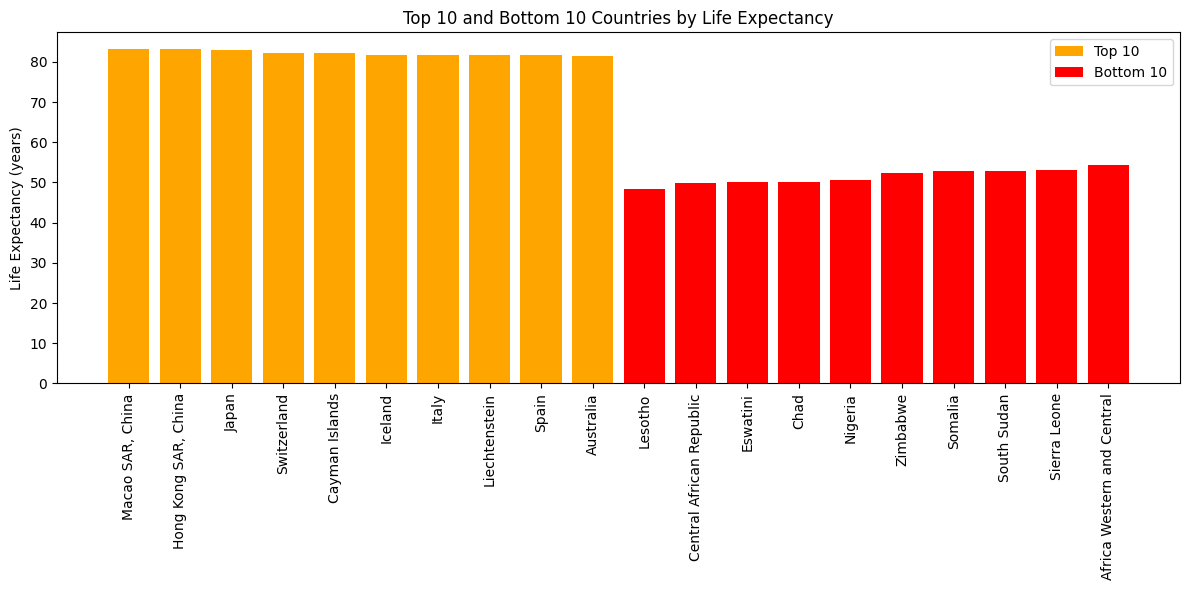

In [9]:
plt.figure(figsize = (12,6))

#Compute average life expectancy per country
life_exp = df.groupby("country")["life_expect"].mean().dropna()

top10 = life_exp.sort_values(ascending = False).head(10)
bottom10 = life_exp.sort_values().head(10)

#Bar Chart
plt.bar(top10.index, top10.values,label="Top 10", color="orange")
plt.bar(bottom10.index, bottom10.values,label="Bottom 10", color="red")
plt.xticks(rotation=90)
plt.ylabel("Life Expectancy (years)")
plt.title("Top 10 and Bottom 10 Countries by Life Expectancy")
plt.legend()
plt.tight_layout()
plt.show()

2.) Distribution of Life Expectancy
- Histogram showing how life expectancy is spread across countries.
- X-axis: Life Expectancy (years)
- Y-axis: Number of Countries


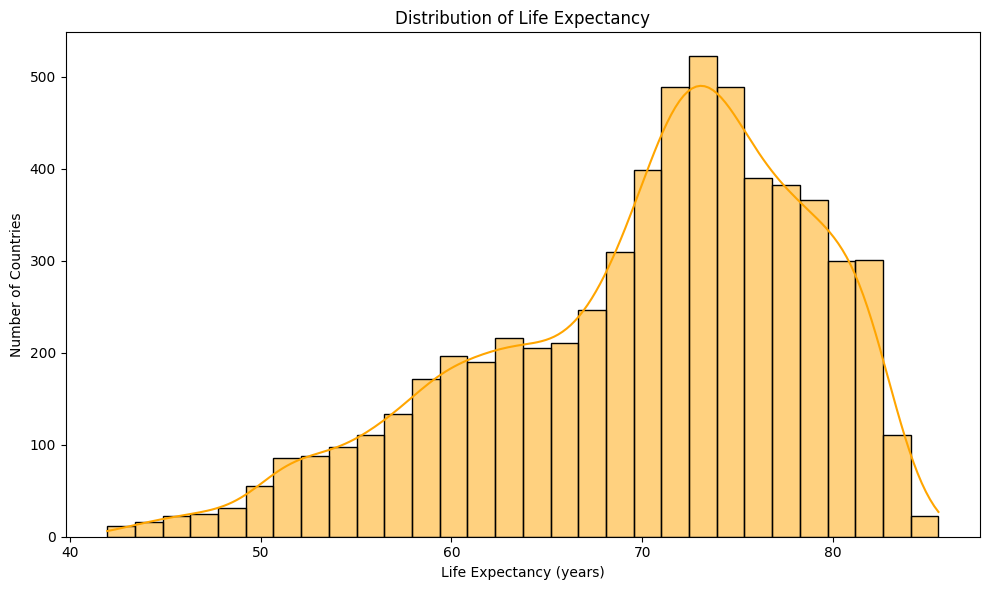

In [10]:
plt.figure(figsize = (10,6))
sns.histplot(df["life_expect"].dropna(), kde=True,bins=30, color = "orange")

plt.xlabel("Life Expectancy (years)")
plt.ylabel("Number of Countries")
plt.title("Distribution of Life Expectancy")
plt.tight_layout()
plt.show()

6.) Bubble Chart
- Health spending vs. life expectancy, with bubble size representing population.
- X-axis: Health Expenditure (% of GDP or per capita, depending on data)
- Y-axis: Life Expectancy (years)
- Bubble size: Population
- Bubble color: Continent or Region


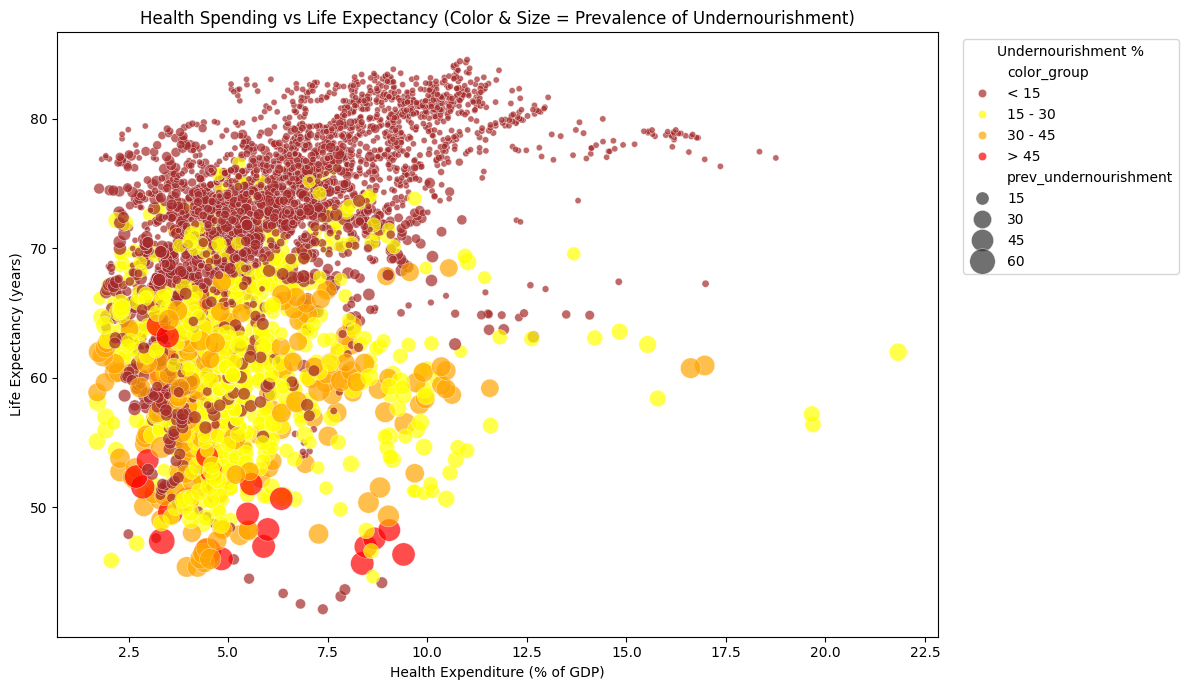

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12,7))

# 1. Create the categories
# We divide the data into 4 groups: 0-15, 15-30, 30-45, and 45+
df['color_group'] = pd.cut(
    df['prev_undernourishment'],
    bins=[0, 15, 30, 45, 100],
    labels=['< 15', '15 - 30', '30 - 45', '> 45']
)

# 2. Define the custom colors in the order of the categories
# Order matches the labels above:
# < 15    = Brown
# 15 - 30 = Yellow
# 30 - 45 = Orange
# > 45    = Red
custom_colors = ["brown", "yellow", "orange", "red"]

sns.scatterplot(
    data=df,
    x="health_exp",
    y="life_expect",
    size="prev_undernourishment",
    hue="color_group",           # Color based on the new groups
    palette=custom_colors,       # Apply the 4 colors
    alpha=0.7,
    sizes=(20, 400)
)

plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy (years)")
plt.title("Health Spending vs Life Expectancy (Color & Size = Prevalence of Undernourishment)")

# Move legend outside to keep the chart clean
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title="Undernourishment %")

plt.tight_layout()
plt.show()